[Kaggle Dataset](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019)

# EDA of Amazon's Top 50 Bestselling Books 2009 - 2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('amazon-bestsellers.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Check for missing data

In [3]:
df.shape # Seems like there are no books omitted

(550, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Looking at the non-null counts for all columns, it's clear that there are no missing values in the dataset.

## Summary statistics of numerical data

In [5]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


There is nothing strange about these statistics. It's reasonable that the number of reviews would vary so much since it's highly dependent on popularity.

## Examining User Ratings

In [6]:
user_rating_counts = df['User Rating'].value_counts().sort_index()
user_rating_counts

3.3      1
3.6      1
3.8      2
3.9      3
4.0     14
4.1      6
4.2      8
4.3     25
4.4     38
4.5     60
4.6    105
4.7    108
4.8    127
4.9     52
Name: User Rating, dtype: int64

The majority of average user ratings for Amazon's bestselling books seem to within the range of 4.6-4.8 stars. The following is a visualization for these numbers:

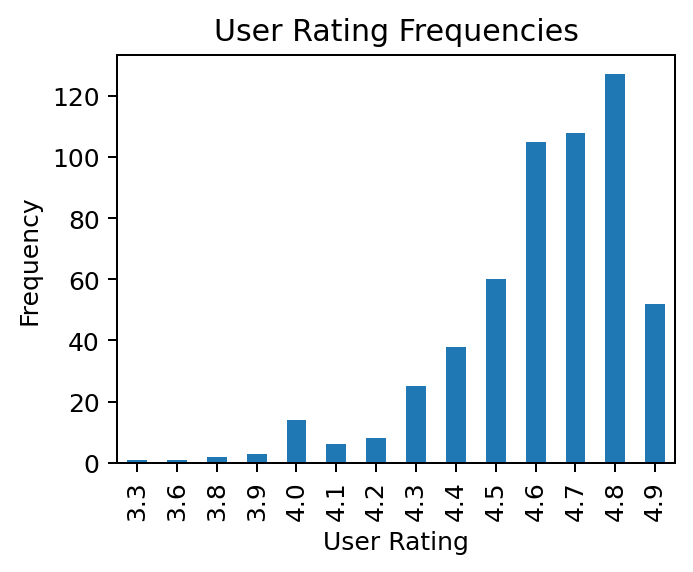

In [7]:
plt.figure(figsize=(4,3), dpi=180)

user_rating_counts.plot.bar()

plt.title('User Rating Frequencies')

plt.xlabel('User Rating')
plt.ylabel('Frequency')

plt.show()

## Correlations

In [8]:
df.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


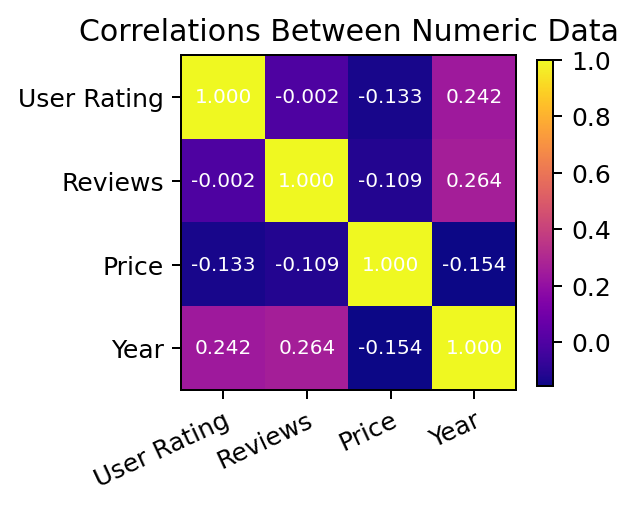

In [9]:
numerical_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(3,3), dpi=180)

heatmap = plt.imshow(numerical_df.corr(), cmap=plt.get_cmap('plasma'))

plt.title('Correlations Between Numeric Data')

plt.xticks(ticks=np.arange(len(numerical_df.columns)), labels=numerical_df.columns, rotation=25, ha='right', rotation_mode='anchor')
plt.yticks(ticks=np.arange(len(numerical_df.columns)), labels=numerical_df.columns)

for i in range(len(numerical_df.columns)):
    for j in range(len(numerical_df.columns)):
        plt.text(i, j, '%.3f' % numerical_df.corr().iloc[i, j], size=8, color='white', va='center', ha='center')

plt.colorbar(heatmap, shrink=0.80)
        
plt.show()

From a quick glance, there does not seem to be any strong correlations between any of the numeric data. Let's take a closer look with some scatter plots: